In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [3]:
big_mart_data = pd.read_csv('Train (1).csv')

In [4]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
big_mart_data.shape

(8523, 12)

In [6]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
big_mart_data["Item_Weight"].mean()

np.float64(12.857645184135976)

In [9]:
big_mart_data["Item_Weight"] = big_mart_data["Item_Weight"].fillna(big_mart_data["Item_Weight"].mean())

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [10]:
mode_of_outlet_size = big_mart_data.pivot_table(values="Outlet_Size", columns="Outlet_Type", aggfunc=(lambda x: x.mode()[0]))

In [11]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [12]:
missing_values = big_mart_data["Outlet_Size"].isnull()

In [14]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [19]:
big_mart_data.loc[missing_values, "Outlet_Size"] = (
    big_mart_data.loc[missing_values, "Outlet_Type"].apply(lambda x: mode_of_outlet_size[x])
)


In [20]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


C:\Users\dhruv\AppData\Local\Temp\ipykernel_30268\2229186239.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data["Item_Weight"])


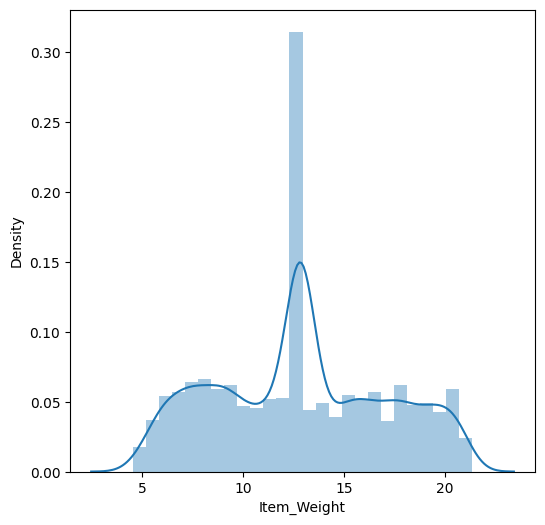

In [23]:
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data["Item_Weight"])
plt.show()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_30268\596084603.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data["Item_Visibility"])


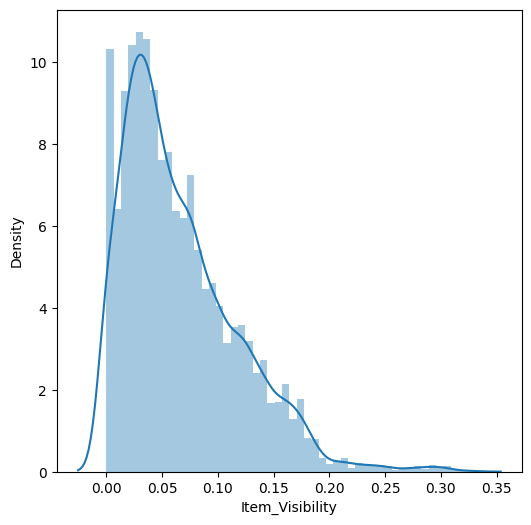

In [24]:
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data["Item_Visibility"])
plt.show()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_30268\1966167963.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data["Item_MRP"])


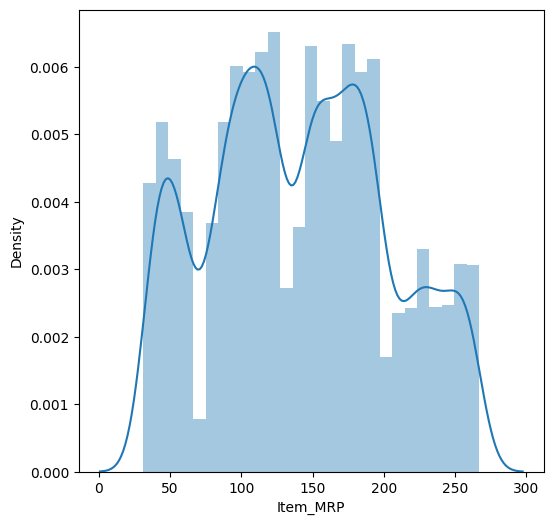

In [25]:
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data["Item_MRP"])
plt.show()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_30268\287739355.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data["Item_Outlet_Sales"])


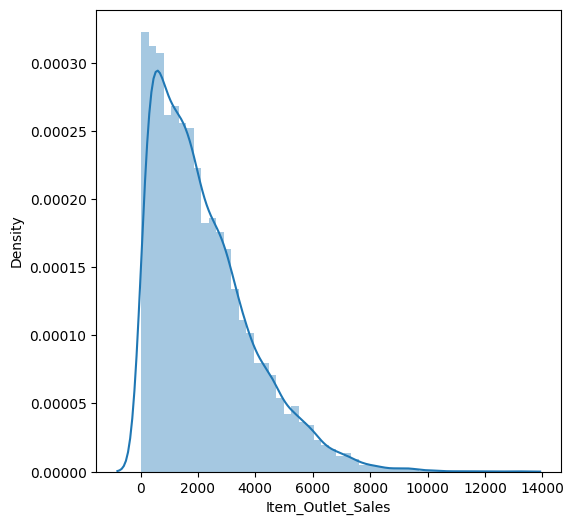

In [26]:
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data["Item_Outlet_Sales"])
plt.show()

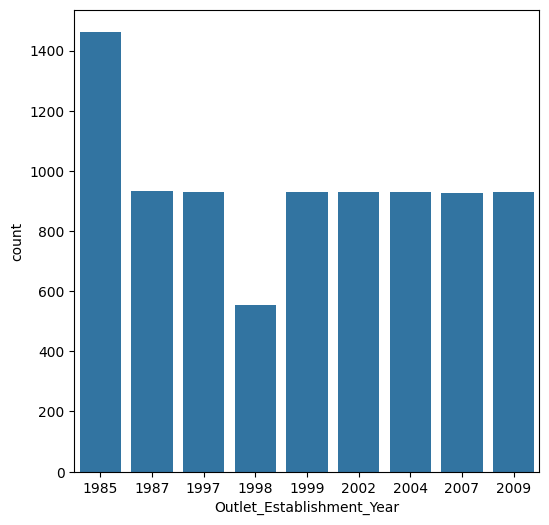

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Establishment_Year",data=big_mart_data)
plt.show()

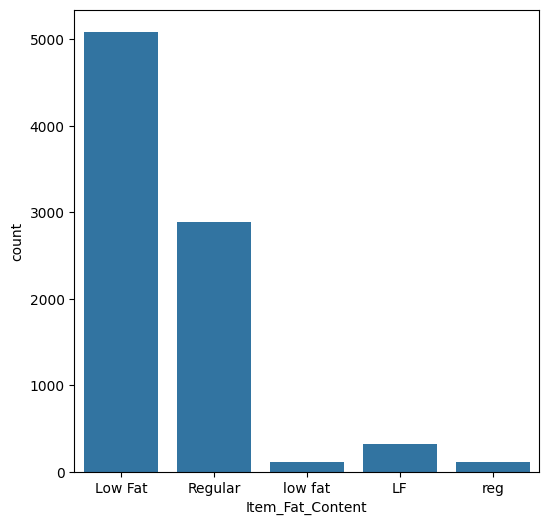

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content",data=big_mart_data)
plt.show()

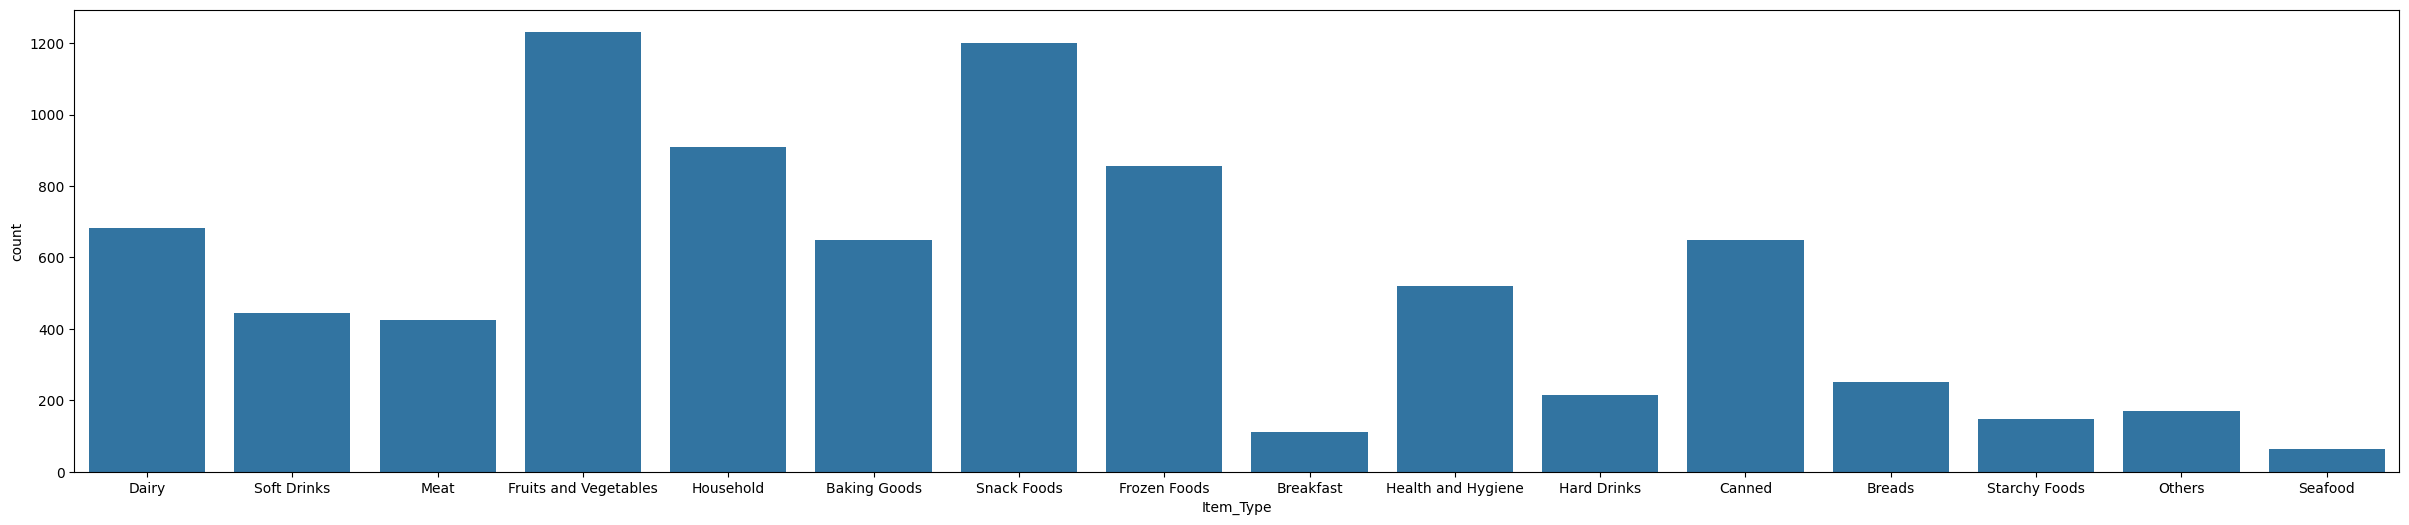

In [30]:
plt.figure(figsize=(30,6))
sns.countplot(x="Item_Type",data=big_mart_data)
plt.show()

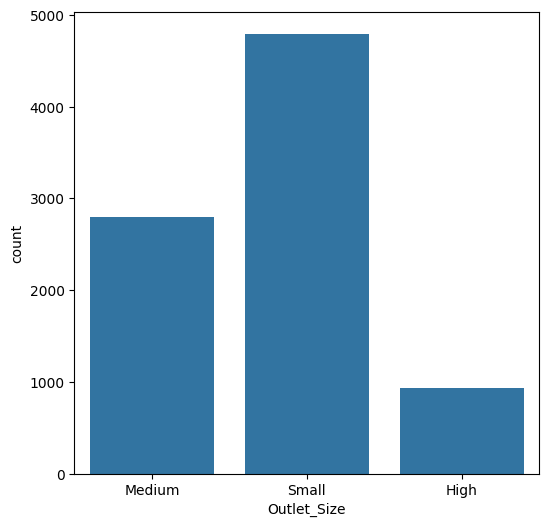

In [31]:
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Size",data=big_mart_data)
plt.show()

In [32]:
big_mart_data["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [34]:
big_mart_data.replace({"Item_Fat_Content": {"LF": "Low Fat", "reg": "Regular", "low fat": "Low Fat"}},inplace=True)

In [35]:
big_mart_data["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [36]:
encoder = LabelEncoder()

In [45]:
big_mart_data["Item_Identifier"] = encoder.fit_transform(big_mart_data["Item_Identifier"])
big_mart_data["Item_Fat_Content"] = encoder.fit_transform(big_mart_data["Item_Fat_Content"])
big_mart_data["Item_Type"] = encoder.fit_transform(big_mart_data["Item_Type"])
big_mart_data["Outlet_Identifier"] = encoder.fit_transform(big_mart_data["Outlet_Identifier"])
big_mart_data["Outlet_Size"] = encoder.fit_transform(big_mart_data["Outlet_Size"])
big_mart_data["Outlet_Location_Type"] = encoder.fit_transform(big_mart_data["Outlet_Location_Type"])
big_mart_data["Outlet_Type"] = encoder.fit_transform(big_mart_data["Outlet_Type"])


In [46]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [47]:
X = big_mart_data.drop(columns="Item_Outlet_Sales", axis=1)
Y = big_mart_data["Item_Outlet_Sales"]

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [60]:
regressor = XGBRegressor()

In [61]:
regressor.fit(X_train, Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [62]:
training_data_prediction = regressor.predict(X_train)

In [63]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [64]:
print("R squared value = ", r2_train)

R squared value =  0.8762174618111388


In [65]:
test_data_prediction = regressor.predict(X_test)

In [66]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [67]:
print("R squared value = ", r2_test)

R squared value =  0.5017253991620692
